In [2]:
import joblib
import numpy as np
import pandas as pd

from sensingpy import reader, plot
from sensingpy.image import Image
from sklearn.base import BaseEstimator

In [3]:
def predict_2d(image: Image, model : BaseEstimator) -> np.ndarray:
    ODW = np.zeros(shape = (image.height, image.width)).ravel()
    ODW[:] = np.nan

    X = pd.DataFrame( { band : image.select(band).ravel() for band in model.feature_names_in_ }).dropna()

    ODW[X.index] = model.predict(X)
    ODW = ODW.reshape((image.height, image.width))

    return ODW

In [4]:
image = reader.open(r'../data/formosa_2018.tif') 

ml_model = joblib.load('../models/ML__MLP.pkl')
cs_ml_model = joblib.load('../models/CS_ML__MLP.pkl')

image['ODW_ML'] = predict_2d(image, ml_model)
image['ODW_CS_ML'] = predict_2d(image, cs_ml_model)

c:\Users\sergi\anaconda3\envs\acolite\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RobustScaler from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\sergi\anaconda3\envs\acolite\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\sergi\anaconda3\envs\acolite\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 1.7.2 when using versio

Text(0.5, 1.0, 'ODW CS + ML')

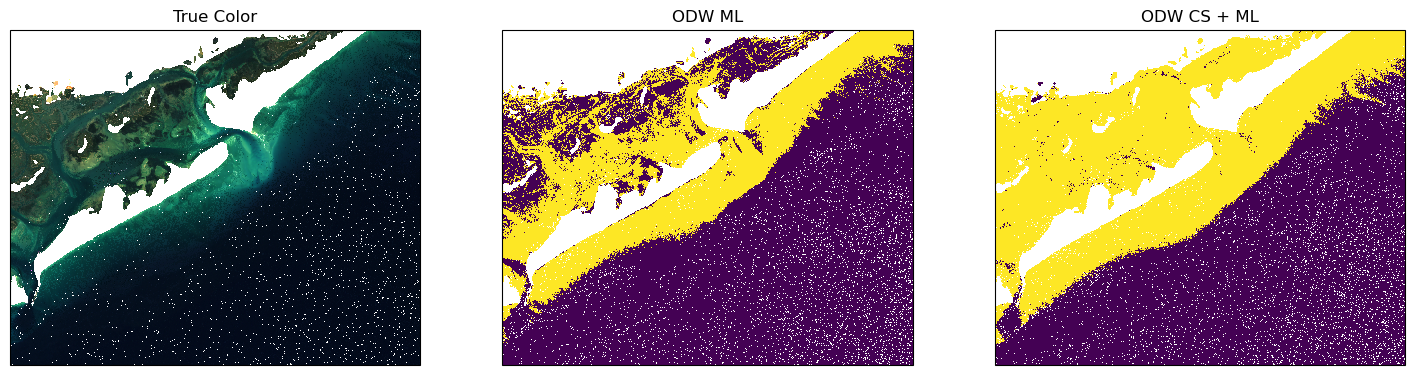

In [5]:
fig, axs = plot.get_geofigure(image.crs, 1, 3, figsize = (6 * 3, 6))

plot.plot_rgb(image, 'Rrs_B4', 'Rrs_B3', 'Rrs_B2', axs[0], brightness = 20)
plot.plot_band(image, 'ODW_ML', axs[1])
plot.plot_band(image, 'ODW_CS_ML', axs[2])

axs[0].set_title('True Color')
axs[1].set_title('ODW ML')
axs[2].set_title('ODW CS + ML')